In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data1=pd.read_excel('Processed Data\Intrinsic Data.xlsx', sheet_name=0, usecols="B:E,H:I")
data2=pd.read_excel('Processed Data\Extrinsic Data.xlsx', sheet_name=0, usecols="B:P")

In [3]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

encoded_data1=pd.DataFrame(encoder.fit_transform(data1[['Breed']]).toarray())

Y1_=data1['Milk Production/Day']
data1=data1.drop(['Breed','Milk Production/Day'],axis=1)

data1=data1.join(encoded_data1)
data1=data1.join(Y1_)

encoded_data2=pd.DataFrame(encoder.fit_transform(data2[['Month','District','Zone','Green \nFodder','Dry\n Fodder']]).toarray())
Y2_=data2['Farm Milk Production per \nDay']
data2=data2.drop(['Month','District','Zone','Green \nFodder','Dry\n Fodder','Farm Milk Production per \nDay'],axis=1)

data2=data2.join(encoded_data2)
data2=data2.join(Y2_)

data2=data2.to_numpy()
X2=data2[:,0:-1]
Y2=data2[:,-1]

In [4]:
data1=data1.to_numpy()
X1=data1[:,0:-1]
Y1=data1[:,-1]

In [5]:
Tdata1=pd.read_excel('TDataIn.xlsx', sheet_name=0, usecols="B:E,H:I")
Tdata2=pd.read_excel('TDataEx.xlsx', sheet_name=0, usecols="B:P")

from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

Tencoded_data1=pd.DataFrame(encoder.fit_transform(Tdata1[['Breed']]).toarray())

TY1_=Tdata1['Milk Production/Day']
Tdata1=Tdata1.drop(['Breed','Milk Production/Day'],axis=1)

Tdata1=Tdata1.join(Tencoded_data1)
Tdata1=Tdata1.join(TY1_)

Tencoded_data2=pd.DataFrame(encoder.fit_transform(Tdata2[['Month','District','Zone','Green \nFodder','Dry\n Fodder']]).toarray())
TY2_=Tdata2['Farm Milk Production per \nDay']
Tdata2=Tdata2.drop(['Month','District','Zone','Green \nFodder','Dry\n Fodder','Farm Milk Production per \nDay'],axis=1)

Tdata2=Tdata2.join(Tencoded_data2)
Tdata2=Tdata2.join(TY2_)

# print(Tdata1)
# print(Tdata2)

Tdata2=Tdata2.to_numpy()
TX2=Tdata2[:,0:-1]
TY2=Tdata2[:,-1]

Tdata1=Tdata1.to_numpy()
TX1=Tdata1[:,0:-1]
TY1=Tdata1[:,-1]

# print(TX1)
# print(TX2)

farmSize=[]
for i in TX2:
    farmSize.append(i[8])
      
    

In [6]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.01, random_state = 0)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.01, random_state = 0)

X1_test=TX1
Y1_test=TY1

X2_test=X2[-18:]
Y2_test=TY2

print(Y2_test)

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error,r2_score
# print(X2_test)


# For Intrinsic.
poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_trans = poly.fit_transform(X1_train)
x_test_trans = poly.transform(X1_test)
lr = LinearRegression()
lr.fit(x_train_trans, Y1_train)
y_pred = lr.predict(x_test_trans)
# print(y_pred)

# For Extrinsic.
poly = PolynomialFeatures(degree=1, include_bias=True)
x_train_trans2 = poly.fit_transform(X2_train)
x_test_trans2 = poly.transform(X2_test)
lr2 = LinearRegression()
lr2.fit(x_train_trans2, Y2_train)
y_pred2 = lr2.predict(x_test_trans2)

# print(y_pred2)

# print(r2_score(Y2_test, y_pred2))

[ 10.   11.   20.   47.    4.5  15.   23.  100.   18.   13.   20.   14.
  16.    8.   20.   17.    9.    3. ]


4.012316002910439
92
[3.7708852543963447, 3.711935860772762, 3.6533686879711587, 3.595202415594376, 3.5374568196705103, 3.4801528409053275, 3.423312656503884, 3.3669597555343875, 3.3111190177471626, 3.2558167956867483, 3.2010809998428904, 3.146941186473723, 3.0934286475987074, 3.040576502496581, 2.9884197898512443, 2.9369955594629373, 2.886342962179948, 2.8365033364049945, 2.787520289188557, 2.739439769538526, 2.692310131153351, 2.646182181328961, 2.6011092123063704, 2.5571470108301324, 2.5143538411966087, 2.4727903966112943, 2.4325197132800773, 2.393607041372827, 2.356119666870343, 2.3201266783964827, 2.2856986735112788, 2.2529073996650615, 2.221825326151946, 2.192525145006337, 2.1650792008908497, 2.1395588526295573, 2.1160337721055154, 2.0945711896727053, 2.0752350988774766, 2.058085436931454, 2.0431772607622425, 2.030559941290262, 2.0202764005303253, 2.0123624169112957, 2.0068460236262813, 2.0037470227507277, 2.0030766343079436, 2.004837294577472, 2.0090226120273607, 2.0156174827173

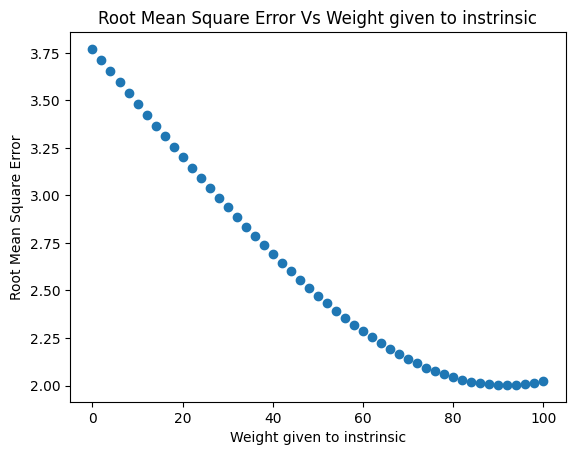

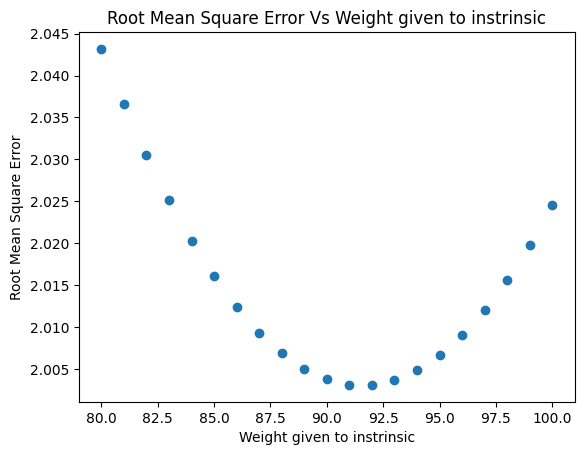

In [7]:
weight=-1
error=6000000

errorAtEachWeight=[]
weightPerError=[]
errorAtEachWeight2=[]
weightPerError2=[]

from sklearn.metrics import mean_squared_error,r2_score
import math

for i in range(0,101):
    wIn=i
    wEx=100-i
    lower=0
    y_predictW=[]
    for idx in range(len(farmSize)):
        upper=lower+int(farmSize[idx])
        sum=0
        for farmIdx in range(lower,upper):
            sum+=y_pred[farmIdx]

        weightedAvg=(sum*wIn+y_pred2[idx]*wEx)/100
        
        for farmIdx in range(lower,upper):
            y_predictW.append(y_pred[farmIdx]*(weightedAvg/sum))
        lower=upper 
        
    if i%2==0:
        errorAtEachWeight.append(math.sqrt(mean_squared_error(y_predictW,Y1_test)))
        weightPerError.append(i)
    if i>=80 and i<=100:
        errorAtEachWeight2.append(math.sqrt(mean_squared_error(y_predictW,Y1_test)))
        weightPerError2.append(i)
    if error > mean_squared_error(y_predictW,Y1_test):
        error = mean_squared_error(y_predictW,Y1_test)
        weight=i;
    
print(error)
print(weight)

print(errorAtEachWeight)
print(weightPerError)

import matplotlib.pyplot as plt


# plot the scatter graph
plt.scatter(weightPerError, errorAtEachWeight)

# set the labels and title of the graph
plt.xlabel('Weight given to instrinsic')
plt.ylabel('Root Mean Square Error')
plt.title('Root Mean Square Error Vs Weight given to instrinsic')

# display the graph
plt.show()

plt.scatter(weightPerError2, errorAtEachWeight2)

# set the labels and title of the graph
plt.xlabel('Weight given to instrinsic')
plt.ylabel('Root Mean Square Error')
plt.title('Root Mean Square Error Vs Weight given to instrinsic')

# display the graph
plt.show()